# Plotting utilities example

In [1]:
import numpy as np
import pysegy as seg
from pysegy import plot_sdata, plot_simage, plot_velocity, plot_fslice, compare_shots, wiggle_plot
import matplotlib.pyplot as plt


In [2]:
block = seg.segy_read('../data/overthrust_2D_shot_1_20.segy')
data = block.data
dt = block.fileheader.bfh.dt / 1e6
dx = 50.0


Reading SEGY file ../data/overthrust_2D_shot_1_20.segy
Loaded header ns=751 dt=4000 from ../data/overthrust_2D_shot_1_20.segy

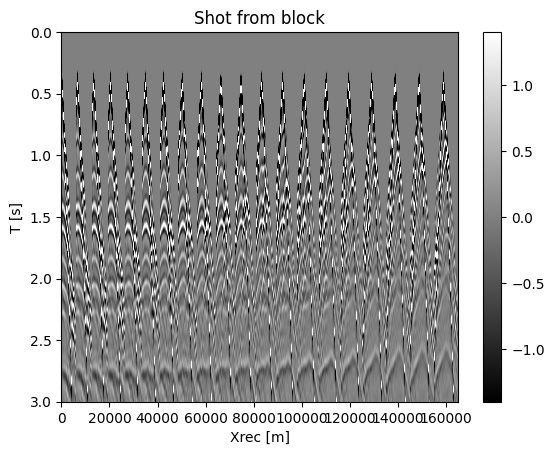

In [3]:
_ = plot_sdata(block, cbar=True, name='Shot from block')
plt.show()

Scanning 1 files in ../data with 5 threads
ThreadPoolExecutor-7_0 scanning file ../data/overthrust_2D_shot_1_20.segy
Header for ../data/overthrust_2D_shot_1_20.segy: ns=751 dt=4000
ThreadPoolExecutor-7_0 found 20 shots in ../data/overthrust_2D_shot_1_20.segy
Combined scan has 20 shots

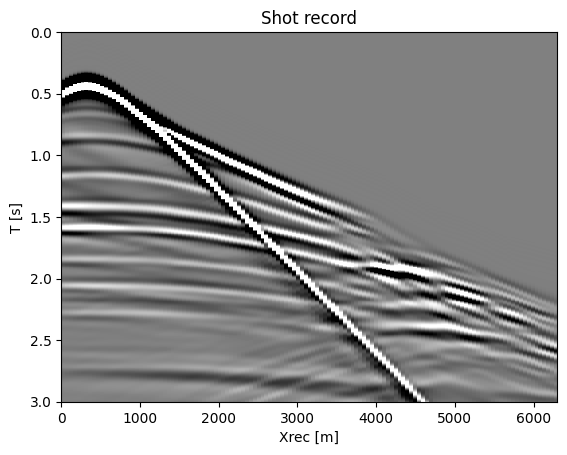

In [4]:
scan = seg.segy_scan('../data', file_key='overthrust_2D_shot_1_20.segy')
shot = scan[0]
plot_sdata(shot)
plt.show()

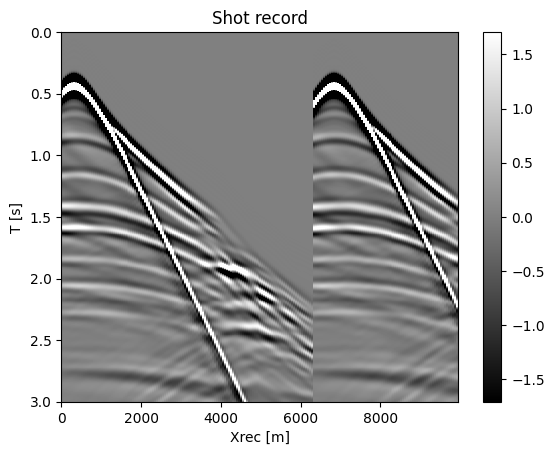

In [5]:
_ = plot_sdata(data[:, :200], (dt, dx), cbar=True, name='Shot record')
plt.show()

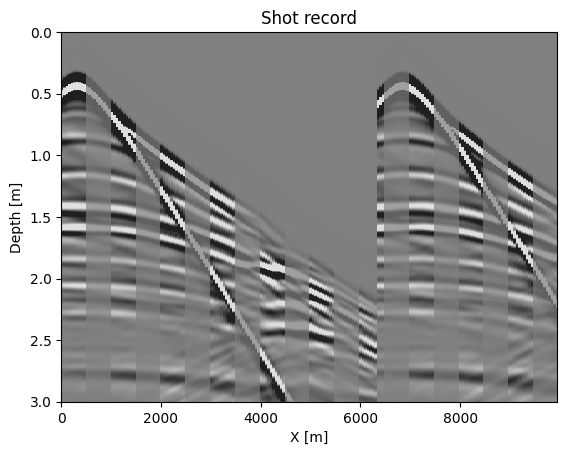

In [6]:
compare_shots(data[:, :200], data[:, :200], (dt, dx), chunksize=10)
plt.show()

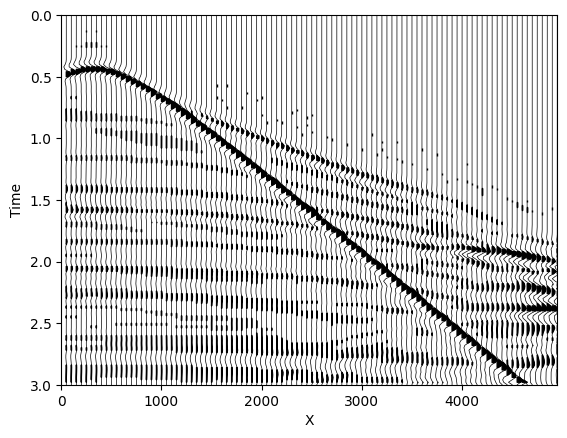

In [7]:
wiggle_plot(data[::5, :100], np.arange(0, 100*dx, dx), np.arange(0, data.shape[0]*dt, dt)[::5])
plt.show()

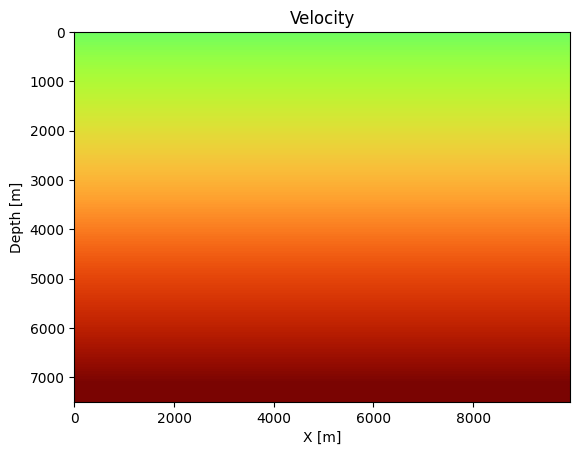

In [8]:
vel = np.outer(np.linspace(1500, 3500, data.shape[0]), np.ones(200))
plot_velocity(vel, (10.0, dx))
plt.show()

In [9]:
assert data.shape[0] == block.fileheader.bfh.ns
assert shot.data.shape[1] == scan.counts[0]